In [ ]:
#importing necessary packages
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score

In [ ]:
#reading dataset into variable data
data=pd.read_csv('/content/Student_Performance.csv')

In [ ]:
#displaying data read from dataset
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
#checking for null values
data.info()
#there are 10000 rows and non-null count is 10000 for all 6 columns so we don't have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
#converting Extracurricular Activities column from categorical to numerical using label encoding
label_encoder = LabelEncoder()
data['Extracurricular Activities']= label_encoder.fit_transform(data['Extracurricular Activities'])

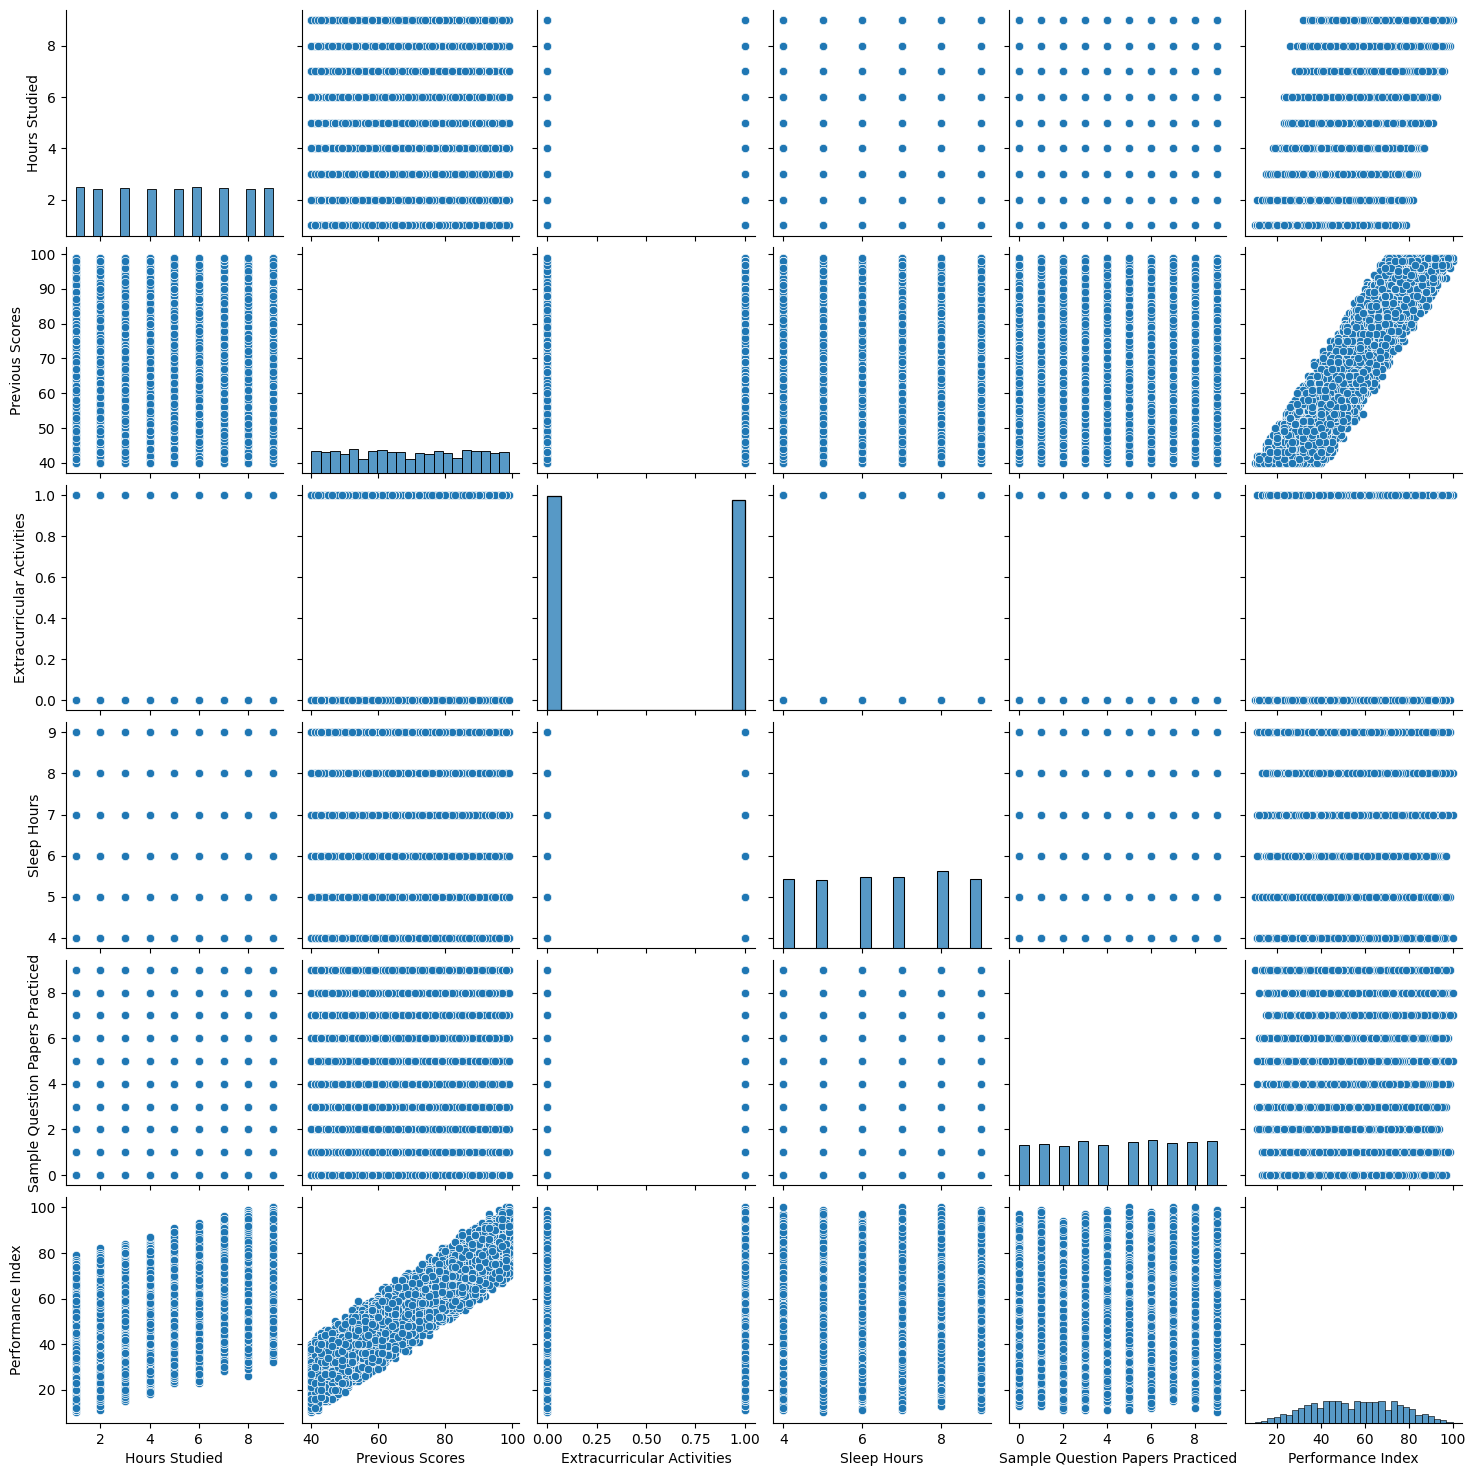

In [ ]:
#checking for collinearity using pairplot
sns.pairplot(data)

In [ ]:
#understanding descriptive statistical measures of dataset
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


<Axes: >

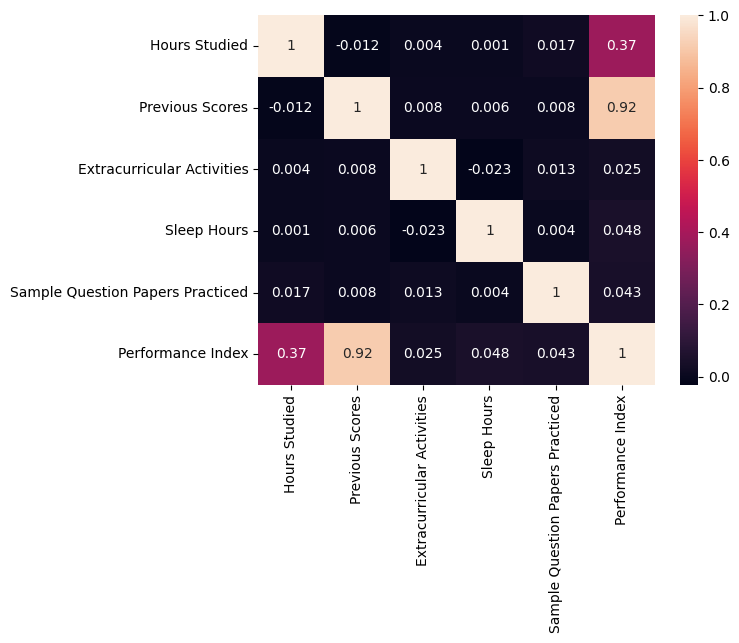

In [ ]:
#finding feature importance using correlation visualized using heatmap
correlation_data=data.corr().round(3)
sns.heatmap(correlation_data,annot=True)

In [ ]:
#from the heatmap,we understood that all features have positive impact on target column but hours studied and previous scores have larger affect compared to other features
#so we are considering 3 columns for our experiment-Hours Studied,Previous Scores and Performance Index and the last column is the label
new_data=data[['Hours Studied','Previous Scores','Performance Index']]

In [ ]:
new_data

,Hours Studied,Previous Scores,Performance Index
0,7,99,91.0
1,4,82,65.0
2,8,51,45.0
3,5,52,36.0
4,7,75,66.0
...,...,...,...
9995,1,49,23.0
9996,7,64,58.0
9997,6,83,74.0
9998,9,97,95.0


In [ ]:
#from descriptive statistics we observed high variance in data so we are performing min-max scaling to scale down entire data from 0-1
scaler=MinMaxScaler()
new_data=pd.DataFrame(scaler.fit_transform(new_data))
new_data.columns=['Hours Studied','Previous Scores','Performance Index']

In [ ]:
new_data

,Hours Studied,Previous Scores,Performance Index
0,0.750,1.000000,0.900000
1,0.375,0.711864,0.611111
2,0.875,0.186441,0.388889
3,0.500,0.203390,0.288889
4,0.750,0.593220,0.622222
...,...,...,...
9995,0.000,0.152542,0.144444
9996,0.750,0.406780,0.533333
9997,0.625,0.728814,0.711111
9998,1.000,0.966102,0.944444


In [ ]:
#capturing trget column in variable y and remaining columns in x variable
y=new_data['Performance Index']
new_data.drop('Performance Index',inplace=True,axis=1)
x=new_data

In [ ]:
#we will split x,y into train and test by 80:20 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)


In [ ]:
#checking size of all 4 sets of data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 2)
(2000, 2)
(8000,)
(2000,)


In [ ]:
#using LinearRegression model from sklearn library to build model
linear_regressor=LinearRegression()
linear_regressor.fit(x_train,y_train)
#fit method build an equation like Performance Index=c+(m1)*(Hours Studied)+(m2)*(Previous Scores)

LinearRegression()

In [ ]:
#evaluating training performance based on mean absolute error,mean squared error,root mean squared error,R2 metrics
predicted_y_train=linear_regressor.predict(x_train)
mse=mean_squared_error(y_train,predicted_y_train)
print('Mean squared error for training dataset is:',mse)
print('Root Mean squared error for training dataset is:',math.sqrt(mse))
print('Mean absolute error for training dataset is:',mean_absolute_error(y_train,predicted_y_train))
print('coefficient of determination for training dataset is:',r2_score(y_train,predicted_y_train))
print('explained variance score for training dataset is:',explained_variance_score(y_train,predicted_y_train))

Mean squared error for training dataset is: 0.0006396731513455459
Root Mean squared error for training dataset is: 0.025291760542626246
Mean absolute error for training dataset is: 0.02014888624658431
coefficient of determination for training dataset is: 0.9859217250993189
explained variance score for training dataset is: 0.9859217250993189


In [ ]:
#using model built in previous step to perform predictions
y_predicted=linear_regressor.predict(x_test)

In [ ]:
#predicted values
y_predicted

array([0.7063664 , 0.57485113, 0.06486176, ..., 0.16678744, 0.5996941 ,
       0.29647086])

In [ ]:
#getting coefficients from model created(m1,m2)
linear_regressor.coef_

array([0.25425925, 0.66817945])

In [ ]:
#getting intercept of model created(c)
linear_regressor.intercept_

0.042211610032647395

In [ ]:
#It implies the equation built by model is Performance Index=0.042+(0.254)*(Hours Studied)+(0.668)*(Previous Scores)

In [ ]:
#evaluating testing performance based on mean absolute error,mean squared error,root mean squared error,R2 metrics
mse=mean_squared_error(y_test,y_predicted)
print('Mean squared error for training dataset is:',mse)
print('Root Mean squared error for training dataset is:',math.sqrt(mse))
print('Mean absolute error for training dataset is:',mean_absolute_error(y_test,y_predicted))
print('coefficient of determination for training dataset is:',r2_score(y_test,y_predicted))
print('explained variance score for training dataset is:',explained_variance_score(y_test,y_predicted))

Mean squared error for training dataset is: 0.0006600784221965257
Root Mean squared error for training dataset is: 0.025691991401923787
Mean absolute error for training dataset is: 0.020401719920400904
coefficient of determination for training dataset is: 0.9856338039482546
explained variance score for training dataset is: 0.9856384673052602
